# Negaunee Iron Formation, Goodrich Quartzite, and associated Ore body Paleomagnetic Analyses

 This notebook analyzes and visualizes the paleomagnetic from the Neguanee Iron Formation, Goodrich Quartzite, and hematite ore body associated with manuscript under review : 
> Fuentes, A.J., Courtney-Davies, L., Flowers, R.M., Zhang, Y., Swanson-Hysell, N.L., Hematite crystallization within Paleoproterozoic iron formation during Neoproterozoic tectonic quiescence, * in review*

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np 
import pmagpy.pmag as pmag
import pmagpy.ipmag as ipmag
import pmagpy.contribution_builder as cb
import matplotlib.pyplot as plt
import mplstereonet

plt.rcParams['pdf.fonttype'] = 42

%matplotlib inline

In [3]:
hmt_color='#de2d26'
mgt_color='#43a2ca'

## Grab Paleomagnetic data from the MagIC contribution for the study

 Here we are pulling the full paleomagnetic dataset and unpacking into the designated directory. Please change the file path in "dir_path" to your desired file directory so the magIC files can be unpacked and used in this notebook



In [16]:
	
# define the path to the folder 
dir_path = '../data/MagIC_Format/review'
# download the data from the MagIC database using my private contribution key 
result, magic_file = ipmag.download_magic_from_id('20184', directory=dir_path, share_key='97f14fd4-aa5e-4816-a13c-c3dff197bc05')
# unpack the MagIC file
ipmag.unpack_magic(magic_file, dir_path)
# get the contribution object
contribution = cb.Contribution(dir_path)
# get the specimen tables
all_specimens= contribution.tables['specimens'].df
all_samples= contribution.tables['samples'].df


Download successful. File saved to: ../data/MagIC_Format/review/magic_contribution_20184.txt
working on:  'contribution'
1  records written to file  /Users/anthonyfuentes/GitHub/Vulcan_Iron_Formation/data/MagIC_Format/review/contribution.txt
contribution  data put in  /Users/anthonyfuentes/GitHub/Vulcan_Iron_Formation/data/MagIC_Format/review/contribution.txt
working on:  'locations'
3  records written to file  /Users/anthonyfuentes/GitHub/Vulcan_Iron_Formation/data/MagIC_Format/review/locations.txt
locations  data put in  /Users/anthonyfuentes/GitHub/Vulcan_Iron_Formation/data/MagIC_Format/review/locations.txt
working on:  'sites'
12  records written to file  /Users/anthonyfuentes/GitHub/Vulcan_Iron_Formation/data/MagIC_Format/review/sites.txt
sites  data put in  /Users/anthonyfuentes/GitHub/Vulcan_Iron_Formation/data/MagIC_Format/review/sites.txt
working on:  'samples'
86  records written to file  /Users/anthonyfuentes/GitHub/Vulcan_Iron_Formation/data/MagIC_Format/review/samples.txt

The specimens table include the fitted thermal demangetization components for the hemtatite (hmt) and magnetite components (Mgt) in both geographic and tilt corrected coordinate systems. We split each component into tilt `['dir_tilt_correction']==100)]` and geographic components`['dir_tilt_correction']==0)]`.

The samples table includes the bedding measurements associated with each specimen. For the fold test, the dip and dip direction of the jaspillite laminae were used and each specimen corresponds to a consistent dip panel.



## Jasper Knob Fold Test 

In this section we will split the all_specimens into Neguanee (IF) and Goodrich Quartzite (gq) groupings. We will then split the Negaunee up into Jasper Knob specimens(JK) and those from New Richmon (NF). We will also combine the IF specimens with their bedding orientations to facilitate a fold test further on in this notebook

In [20]:
IF_samples=all_samples[all_samples['sample'].str.match('jk.|NF.')]
gq_samples=all_samples[all_samples['sample'].str.match('GQ.')]

IF_specimen=all_specimens[all_specimens['sample'].str.match('jk.|NF.')]
gq_specimens=all_specimens[all_specimens['sample'].str.match('GQ.')]

In [21]:
IF_bedding=IF_samples[['sample','bed_dip_direction','bed_dip']]

IF_hmt_geo=IF_specimen[(IF_specimen['dir_comp']=='Hmt')&(IF_specimen['dir_tilt_correction']==0)]
IF_hmt_tilt=IF_specimen[(IF_specimen['dir_comp']=='Hmt')&(IF_specimen['dir_tilt_correction']==100)]

IF_mgt_geo=IF_specimen[(IF_specimen['dir_comp']=='Mgt')&(IF_specimen['dir_tilt_correction']==0)]
IF_mgt_tilt=IF_specimen[(IF_specimen['dir_comp']=='Mgt')&(IF_specimen['dir_tilt_correction']==100)]


IF_hmt_geo=pd.merge(IF_hmt_geo,IF_bedding,on='sample')
IF_mgt_geo=pd.merge(IF_mgt_geo,IF_bedding,on='sample')

## Plot Negaunee-wid directions for comparison 

As a sanity check, let's plot the magnetite and hematite components in both coordinate systems

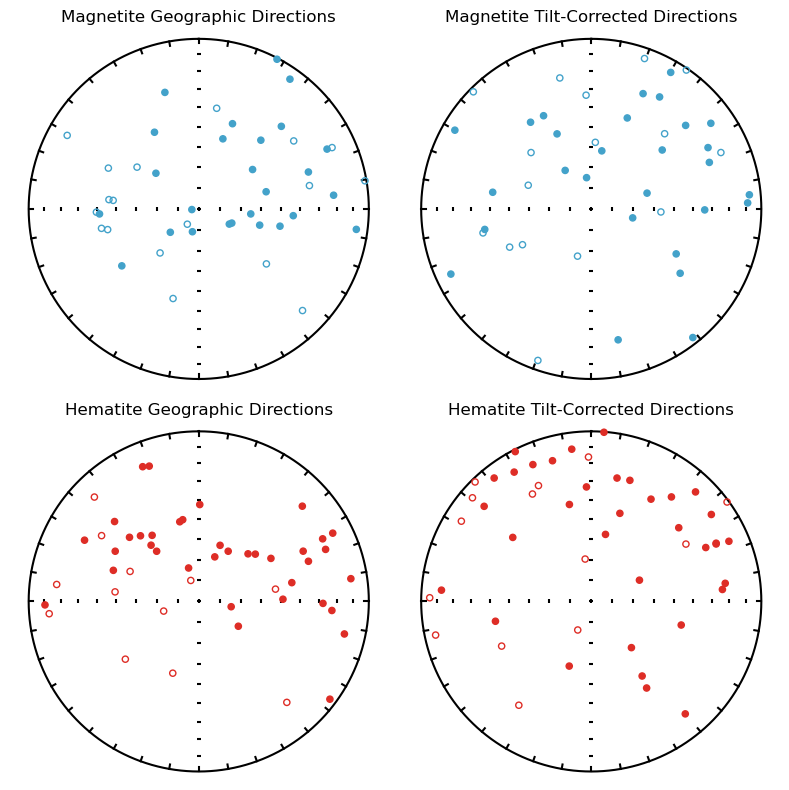

In [22]:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
ipmag.plot_net()
plt.title('Magnetite Geographic Directions')
ipmag.plot_di(dec=IF_mgt_geo['dir_dec'].tolist(), inc=IF_mgt_geo['dir_inc'].tolist(),color=mgt_color)

plt.subplot(2,2,2)
ipmag.plot_net()
plt.title('Magnetite Tilt-Corrected Directions')
ipmag.plot_di(dec=IF_mgt_tilt['dir_dec'].tolist(), inc=IF_mgt_tilt['dir_inc'].tolist(),color=mgt_color)

plt.subplot(2,2,3)
ipmag.plot_net()
plt.title('Hematite Geographic Directions')
ipmag.plot_di(dec=IF_hmt_geo['dir_dec'].tolist(), inc=IF_hmt_geo['dir_inc'].tolist(),color=hmt_color)

plt.subplot(2,2,4)
ipmag.plot_net()
plt.title('Hematite Tilt-Corrected Directions')
ipmag.plot_di(dec=IF_hmt_tilt['dir_dec'].tolist(), inc=IF_hmt_tilt['dir_inc'].tolist(),color=hmt_color)
plt.show()

## Grab and split up Jasper Knob specimens 

Now that we have split the specimens into their respective formation affiliations we can further split the Negaunee into the Jasper Knob (jk) and New Richmond data (nf)

In [27]:
jk_hmt_geo=IF_hmt_geo[IF_hmt_geo['sample'].str.match('jk.')]
jk_hmt_tilt=IF_hmt_tilt[IF_hmt_tilt['sample'].str.match('jk.')]


NF_hmt_geo=IF_hmt_geo[IF_hmt_geo['sample'].str.match('NF.')]
NF_hmt_tilt=IF_hmt_tilt[IF_hmt_tilt['sample'].str.match('NF.')]



Let's further subdivide the Jasper Knob samples into the jaspillite samples (jk.3 through jk.21) and the south and west pit samples. 
The samples on the south and west sides of Jasper Knob correspond to a oriented blocks taken from relict mine pits ( Fig 1C. in manuscript)

In [30]:
young_specimens=['jk.22a','jk.23a','jk.24a','jk.25a','jk.26a','jk.27a','jk.28a','jk.29a','jk.31a','jk.35a','jk.36a',
                 'jk.37a']

jk_top=jk_hmt_geo[~jk_hmt_geo['sample'].isin(young_specimens)]
jk_top_tilt=jk_hmt_tilt[~jk_hmt_tilt['sample'].isin(young_specimens)]

jk_side_specimens=['jk.22a','jk.23a','jk.24a','jk.25a']
jk_side_geo=jk_hmt_geo[jk_hmt_geo['specimen'].isin(jk_side_specimens)]

jk_side_tilt=jk_hmt_tilt[jk_hmt_tilt['specimen'].isin(jk_side_specimens)]

jk_west_specimens=['jk.26a','jk.27a','jk.28a','jk.29a','jk.30a','jk.31a','jk.35a']
jk_west_geo=jk_hmt_geo[jk_hmt_geo['specimen'].isin(jk_west_specimens)]
jk_west_tilt=jk_hmt_tilt[jk_hmt_tilt['specimen'].isin(jk_west_specimens)]


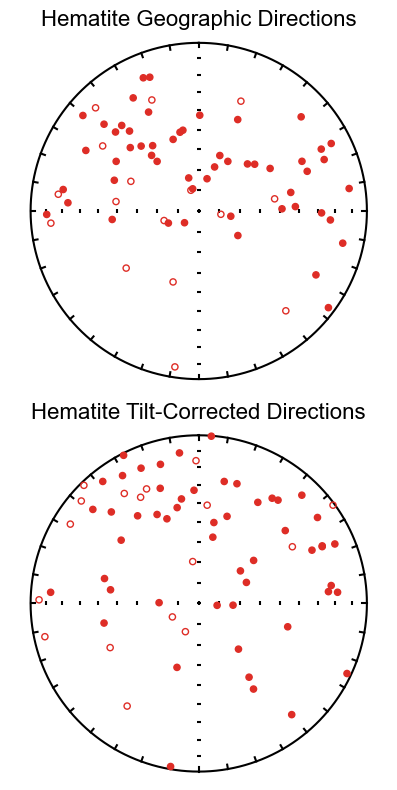

In [25]:
plt.figure(figsize=(8,8))



plt.subplot(2,2,1)
ipmag.plot_net()
plt.title('Hematite Geographic Directions',font='arial',fontsize=16)
ipmag.plot_di(dec=IF_hmt_geo['dir_dec'].tolist(), inc=IF_hmt_geo['dir_inc'].tolist(),color=hmt_color)

plt.subplot(2,2,3)
ipmag.plot_net()
plt.title('Hematite Tilt-Corrected Directions', font='arial',fontsize=16)
ipmag.plot_di(dec=IF_hmt_tilt['dir_dec'].tolist(), inc=IF_hmt_tilt['dir_inc'].tolist(),color=hmt_color)

### Goodrich Conglomerate 

#### This section is to run the conglemerate test on the GQ5 locality that we collected oriented IF clasts within the basal Goodrich Quartzite